In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import numpy as np
import os

<h3>Plot Target and Predictions

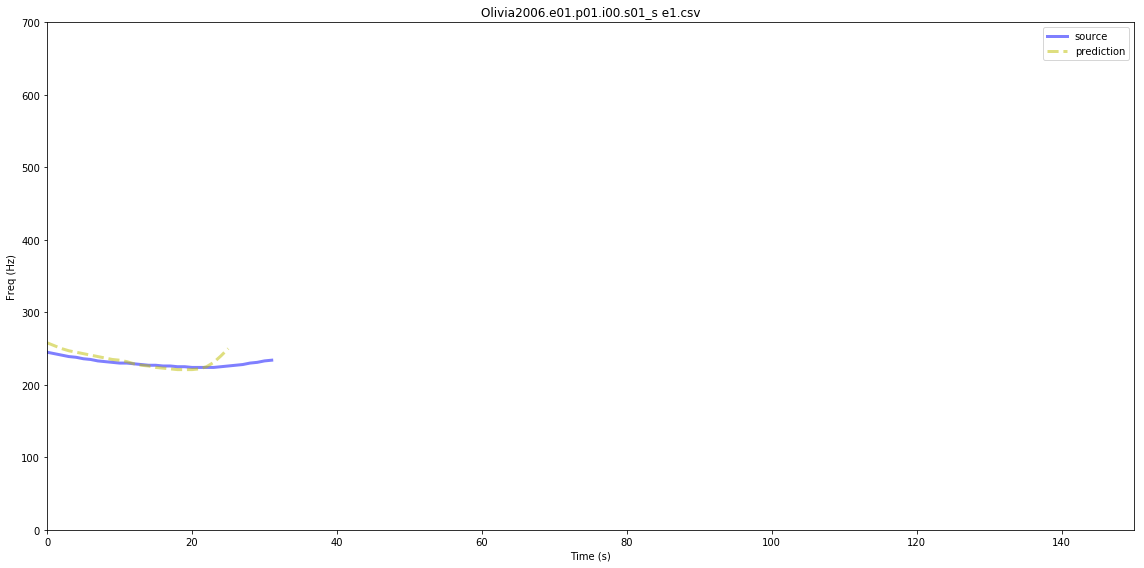

FileNotFoundError: [Errno 2] No such file or directory: 'Olivia2006.e01.p01.i00.s01_s e1/.png.png'

In [1]:
# open the target and pred textfiles
filepath_source = '/Users/robinson/Downloads/data/pred/20180628_151243/test_source.txt'  # use quantised version
# filepath_target = '/Users/robinson/Downloads/data/pred/20180524_114605/test_target.txt'  # use quantised version
filepath_pred = '/Users/robinson/Downloads/data/pred/20180628_151243/predictions.txt'  # use quantised version
filepath_testlog = '/Users/robinson/Downloads/data/pred/20180628_151243/test_log.txt'  # use quantised version
# open files for reading
fs = open(filepath_source, 'r')
# ft = open(filepath_target, 'r')
fp = open(filepath_pred, 'r')
ftl = open(filepath_testlog, 'r')

# read lines (one line per f0 contour) into lists of strings, stripping all whitespace and empty lines
source_strings = fs.read().strip().split('\n')
# target_strings = ft.read().strip().split('\n')
pred_strings = fp.read().strip().split('\n')
test_log_strings = ftl.read().strip().split('\n')

for i in range(len(source_strings)):
    # parse strings and divide all ints by 100 to get real float f0 value (use float(x)/100 for d2p)
    source_array = np.array([float(x) for x in source_strings[i].split(' ')])
    # target_array = np.array([float(x) for x in target_strings[i].split(' ')])
    
    # if line == 'UNK':
    # [a if C else b for i in items]
    
    # if pred string is empty, move on to next iteration. if UNK found, replace with 0.0
    if pred_strings[i]:
        pred_array = np.array([float(x) if x != 'UNK' else float(0) for x in pred_strings[i].split(' ')])
    else:
        continue
        
    fig = plt.figure(figsize=(16, 8))
    plt.title(test_log_strings[i])
    plt.xlabel('Time (s)')
    plt.ylabel('Freq (Hz)')
    plt.xlim(0, 150)
    plt.ylim(0, 700)
    
    plt.plot(range(np.shape(source_array)[0]), source_array, color='b', alpha=0.5, linewidth=3, label='source')
    # plt.plot(range(np.shape(target_array)[0]), target_array, color='y', alpha=0.5, linewidth=3, label='target')
    plt.plot(range(np.shape(pred_array)[0]), pred_array, '--', color='y', alpha=0.5, linewidth=3, label='prediction')
#     plt.scatter(range(np.shape(pred_array)[0]), pred_array, color='r', label='pred', s=1)

    plt.legend()
    plt.tight_layout()
    plt.show()
    
    outfilepath = '/Users/robinson/Downloads/data/pred/20180628_151243/predictions/'
    if not os.path.exists(outfilepath):
        os.mkdir(outfilepath)
    outfilename, _ = os.path.splitext(test_log_strings[i])
    fig.savefig(os.path.join(outfilepath, outfilename + '.png'))    

# calc diff between the two
# plot the diff on same/another plot

# close the files
fs.close()
# ft.close()
fp.close()